# Assignment 4

Please read the following instructions carefully:

This assignment will test your knowledge of machine learning and data visualisation techniques in Python. This will primarily focus on PyTorch and torchvision and how to program using these packages and as such you should use the appropriate functionality provided by the packages. You may also use Numpy, scikit-learn, Tensorboard and Matplotlib where appropriate for some questions. Do not use any other external packages other than these.

In the below questions you will generally need to complete the code in the cell below the question and output the required results, charts or graphs. 

Questions 1-5 are each worth 5 marks.

#### 1. Load/download and normalize the FashionMNIST training and test datasets using torchvision.
    
#### And show some training images by visualising a (training) batch of images.

In [1]:
#Importing Important Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.autograd import Variable

import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import confusion_matrix

If the GPU is available use it for the computation otherwise use the CPU.


In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

There are 2 ways to load the Fashion MNIST dataset.

1.   Load csv and then inherite Pytorch Dataset class .
2.   Use Pytorch module torchvision.datasets. It has many popular datasets like MNIST, FashionMNIST, CIFAR10 e.t.c.



We use DataLoader class from torch.utils.data to load data in batches in both method.
Comment out the code of a method which you are not using.

1. Using a Dataset class.
First load the data from the disk using pandas read_csv() method.

Now inherit Dataset class in your own class that you are building, lets say FashionData.

It has 2 methods: get_item( ) and len().
get_item( ) return the images and labels and len( ) returns the number of items in a dataset.

In [8]:
!cp /content/drive/MyDrive/fashion-mnist_test.csv.zip .
!cp /content/drive/MyDrive/fashion-mnist_train.csv.zip .

!unzip fashion-mnist_test.csv.zip
!unzip fashion-mnist_train.csv.zip

Archive:  fashion-mnist_test.csv.zip
  inflating: fashion-mnist_test.csv  
Archive:  fashion-mnist_train.csv.zip
  inflating: fashion-mnist_train.csv  


## Loading the fashion Mnist dataset using Pytorch

In [16]:
##Loading the fashion Mnist dataset using Pytorch
test_csv = pd.read_csv("./fashion-mnist_test.csv")
train_csv = pd.read_csv("./fashion-mnist_train.csv")

In [18]:
class FashionDataset(Dataset):
    """User defined class to build a datset using Pytorch class Dataset."""
    
    def __init__(self, data, transform = None):
        """Method to initilaize variables.""" 
        self.fashion_MNIST = list(data.values)
        self.transform = transform
        
        label = []
        image = []
        
        for i in self.fashion_MNIST:
             # first column is of labels.
            label.append(i[0])
            image.append(i[1:])
        self.labels = np.asarray(label)
        # Dimension of Images = 28 * 28 * 1. where height = width = 28 and color_channels = 1.
        self.images = np.asarray(image).reshape(-1, 28, 28, 1).astype('float32')

    def __getitem__(self, index):
        label = self.labels[index]
        image = self.images[index]
        
        if self.transform is not None:
            image = self.transform(image)

        return image, label

    def __len__(self):
        return len(self.images)

In [19]:
# Transform data into Tensor that has a range from 0 to 1
train_set = FashionDataset(train_csv, transform=transforms.Compose([transforms.ToTensor()]))
test_set = FashionDataset(test_csv, transform=transforms.Compose([transforms.ToTensor()]))

train_loader = DataLoader(train_set, batch_size=100)
test_loader = DataLoader(train_set, batch_size=100)

In [20]:
def output_label(label):
    output_mapping = {
                 0: "T-shirt/Top",
                 1: "Trouser",
                 2: "Pullover",
                 3: "Dress",
                 4: "Coat", 
                 5: "Sandal", 
                 6: "Shirt",
                 7: "Sneaker",
                 8: "Bag",
                 9: "Ankle Boot"
                 }
    input = (label.item() if type(label) == torch.Tensor else label)
    return output_mapping[input]

torch.Size([100, 1, 28, 28])
2


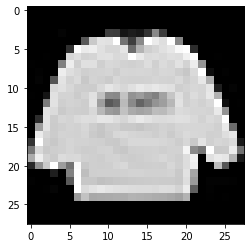

In [61]:
a = next(iter(train_loader))
print(a[0].size())

image, label = next(iter(train_set))
plt.imshow(image.squeeze(), cmap="gray")
print(label)

## Visualizing batch of images

<class 'torch.Tensor'> <class 'torch.Tensor'>
torch.Size([10, 1, 28, 28]) torch.Size([10])
labels:  Pullover, Ankle Boot, Shirt, T-shirt/Top, Dress, Coat, Coat, Sandal, Coat, Bag, 

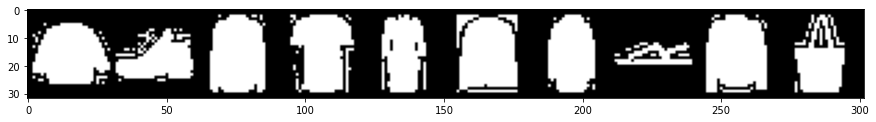

In [62]:
demo_loader = torch.utils.data.DataLoader(train_set, batch_size=10)
batch = next(iter(demo_loader))
images, labels = batch
print(type(images), type(labels))
print(images.shape, labels.shape)

grid = torchvision.utils.make_grid(images, nrow=10)
plt.figure(figsize=(15, 20))
plt.imshow(np.transpose(grid, (1, 2, 0)))
print("labels: ", end=" ")
for i, label in enumerate(labels):
    print(output_label(label), end=", ")


#### 2. Define a Convolutional Neural Network, to train on the data above for classification task. Specifically, please define a network with the following architecture:

`Convolution layer1 with kernel size 3x3 and output channel 8`

`Convolution layer2 with kernel size 3x3 and output channel 16`

`Average pooling layer with kernel size 2x2 and stride 2, to be applied after each convolution layer`

`Fully-connected layer1 with output feature size 128`

`Fully-connected layer2 with output feature size 64`

`The final fully-connected layer3`

`Use ReLU activation function after each convolution and fully-connected (except the last one, fc3) layers`

Please define a cross-entropy loss function for classification and the SGD with momentum=0.9 and learning-rate=0.001 for the optimizer.

In [98]:
#Creating a Convolution Neural Netwok
class FCNN(nn.Module):
    
    def __init__(self):
        super(FCNN, self).__init__()
        
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, padding=1),
            nn.BatchNorm2d(8),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        self.fc1 = nn.Linear(in_features=576, out_features=128)
        self.drop = nn.Dropout2d(0.25)
        self.fc2 = nn.Linear(in_features=128, out_features=64)
        self.fc3 = nn.Linear(in_features=64, out_features=10)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        out = self.drop(out)
        out = self.fc2(out)
        out = self.fc3(out)
        
        return out

In [101]:
model = FCNN()
model.to(device)
error = nn.CrossEntropyLoss()
learning_rate = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
print(model)

FCNN(
  (layer1): Sequential(
    (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=576, out_features=128, bias=True)
  (drop): Dropout2d(p=0.25, inplace=False)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


#### 3. Train the network on the training data defined above, for 5 epochs.

#### Please also print the running loss for the training process.

In [106]:
#Train the Neural network with the above data
num_epochs = 5
count = 0
# Lists for visualization of loss and accuracy 
loss_list = []
iteration_list = []
accuracy_list = []

# Lists for knowing classwise accuracy
predictions_list = []
labels_list = []

for epoch in range(num_epochs):
    for images, labels in train_loader:
        # Transfering images and labels to GPU if available
        images, labels = images.to(device), labels.to(device)
    
        train = Variable(images.view(100, 1, 28, 28))
        labels = Variable(labels)
        
        # Forward pass 
        outputs = model(train)
        loss = error(outputs, labels.long())
    

        # Initializing a gradient as 0 so there is no mixing of gradient among the batches
        optimizer.zero_grad()
        
        #Propagating the error backward
        loss.backward()
        
        # Optimizing the parameters
        optimizer.step()
        count += 1
    
        # Testing the model
        if not (count % 50):    # It's same as "if count % 50 == 0"
            total = 0
            correct = 0
        
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                labels_list.append(labels)
            
                test = Variable(images.view(100, 1, 28, 28))
            
                outputs = model(test)
            
                predictions = torch.max(outputs, 1)[1].to(device)
                predictions_list.append(predictions)
                correct += (predictions == labels).sum()
            
                total += len(labels)
            
            accuracy = correct * 100 / total
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
        
        if not (count % 50):
            print("Iteration: {}, Loss: {}, Accuracy: {}%".format(count, loss.data, accuracy))

Iteration: 50, Loss: 0.23916272819042206, Accuracy: 89.88166809082031%
Iteration: 100, Loss: 0.3034414052963257, Accuracy: 89.875%
Iteration: 150, Loss: 0.40755629539489746, Accuracy: 89.51333618164062%
Iteration: 200, Loss: 0.2710783779621124, Accuracy: 88.8616714477539%
Iteration: 250, Loss: 0.33744195103645325, Accuracy: 89.94833374023438%
Iteration: 300, Loss: 0.25281205773353577, Accuracy: 89.37667083740234%
Iteration: 350, Loss: 0.37286537885665894, Accuracy: 90.00499725341797%
Iteration: 400, Loss: 0.3131195306777954, Accuracy: 89.63833618164062%
Iteration: 450, Loss: 0.46809521317481995, Accuracy: 88.82167053222656%
Iteration: 500, Loss: 0.44980648159980774, Accuracy: 89.92833709716797%
Iteration: 550, Loss: 0.27842259407043457, Accuracy: 90.02000427246094%
Iteration: 600, Loss: 0.30370569229125977, Accuracy: 90.34000396728516%
Iteration: 650, Loss: 0.22390438616275787, Accuracy: 90.22166442871094%
Iteration: 700, Loss: 0.3200002908706665, Accuracy: 90.23999786376953%
Iteration

#### 4. Please plot the training loss curve, using either Matplotlib or Tensorboard.

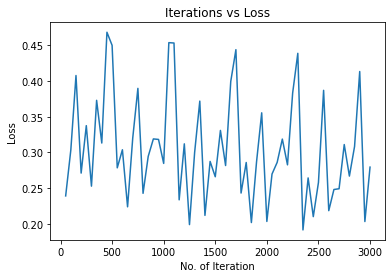

In [109]:
#Plot the accuracy and loss curve
_loss_list = [i.cpu() for i in loss_list]
plt.plot(np.array(iteration_list), np.array(_loss_list))
plt.xlabel("No. of Iteration")
plt.ylabel("Loss")
plt.title("Iterations vs Loss")
plt.show()

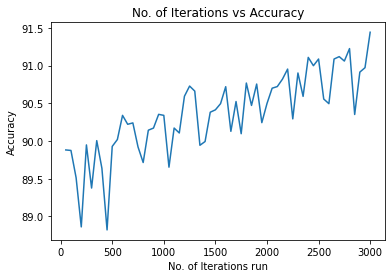

In [111]:
_accuracy_list = [i.cpu() for i in accuracy_list]
plt.plot(iteration_list, _accuracy_list)
plt.xlabel("No. of Iterations run")
plt.ylabel("Accuracy")
plt.title("No. of Iterations vs Accuracy")
plt.show()

#### 5. Please save the trained model above.

#### Then load this trained model and test its performance on the test set. Please print the average accuracy over the whole test set.
    
#### Please also visualise the confusion matrix of the accuracy over each of the categories/classes.

In [112]:
#Load the trained model and check its performance
class_correct = [0. for _ in range(10)]
total_correct = [0. for _ in range(10)]

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        test = Variable(images)
        outputs = model(test)
        predicted = torch.max(outputs, 1)[1]
        c = (predicted == labels).squeeze()
        
        for i in range(100):
            label = labels[i]
            class_correct[label] += c[i].item()
            total_correct[label] += 1
        
for i in range(10):
    print("Accuracy of {}: {:.2f}%".format(output_label(i), class_correct[i] * 100 / total_correct[i]))

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


Accuracy of T-shirt/Top: 84.22%
Accuracy of Trouser: 99.18%
Accuracy of Pullover: 88.93%
Accuracy of Dress: 91.93%
Accuracy of Coat: 87.33%
Accuracy of Sandal: 97.33%
Accuracy of Shirt: 71.32%
Accuracy of Sneaker: 96.48%
Accuracy of Bag: 98.85%
Accuracy of Ankle Boot: 97.92%


## Confusion matrix 

In [113]:
from itertools import chain 

predictions_l = [predictions_list[i].tolist() for i in range(len(predictions_list))]
labels_l = [labels_list[i].tolist() for i in range(len(labels_list))]
predictions_l = list(chain.from_iterable(predictions_l))
labels_l = list(chain.from_iterable(labels_l))

In [114]:
import sklearn.metrics as metrics

confusion_matrix(labels_l, predictions_l)
print("Classification report for CNN :\n%s\n"
      % (metrics.classification_report(labels_l, predictions_l)))

Classification report for CNN :
              precision    recall  f1-score   support

           0       0.84      0.87      0.85    360000
           1       0.98      0.98      0.98    360000
           2       0.84      0.86      0.85    360000
           3       0.89      0.91      0.90    360000
           4       0.83      0.83      0.83    360000
           5       0.98      0.98      0.98    360000
           6       0.78      0.70      0.74    360000
           7       0.95      0.96      0.96    360000
           8       0.97      0.98      0.98    360000
           9       0.97      0.96      0.96    360000

    accuracy                           0.90   3600000
   macro avg       0.90      0.90      0.90   3600000
weighted avg       0.90      0.90      0.90   3600000


